In [1]:
!pip install tensorflow==2.0.0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0'

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
type(train_images)

numpy.ndarray

In [9]:
type(train_labels)

numpy.ndarray

In [10]:
# these are numpy arrays
# this is why train_images = train_images / 255.0 works

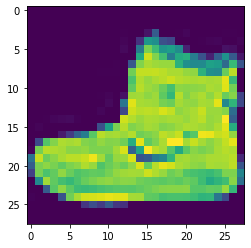

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.show()

In [12]:
# need to understand how to flatten and unflatten the array
import numpy as np

train_images_f = np.reshape(train_images, (60000, 784))

In [13]:
train_images_f.shape

(60000, 784)

In [14]:
train_images_uf = np.reshape(train_images_f, (60000, 28, 28))

In [15]:
train_images_uf.shape

(60000, 28, 28)

In [16]:
type(train_images_uf)

numpy.ndarray

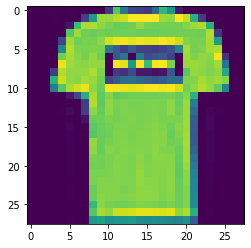

In [17]:
plt.figure()
plt.imshow(train_images_uf[1])
plt.show()

In [18]:
# so we just successfully flattened and then unflattened the set of all images
# now we will proceed with the rest of the lecture

In [19]:
# the following chagnes all the values to be between 0 and 1
# and is possible because of numpy array
# this is normalization

train_images = train_images / 255.0

In [20]:
test_images = test_images / 255.0

In [21]:
# define the model using Keras
# we are pulling the activation functions directly
# from the tensorflow package


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [22]:
# we compile the model using purely Keras syntax

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# fit the ,model

model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 387us/sample - loss: 0.5061 - accuracy: 0.8219
Epoch 2/5
60000/60000 [==============================] - 21s 357us/sample - loss: 0.3782 - accuracy: 0.8642
Epoch 3/5
60000/60000 [==============================] - 21s 344us/sample - loss: 0.3391 - accuracy: 0.8762
Epoch 4/5
60000/60000 [==============================] - 19s 323us/sample - loss: 0.3136 - accuracy: 0.8851
Epoch 5/5
60000/60000 [==============================] - 19s 320us/sample - loss: 0.2959 - accuracy: 0.8914


In [ ]:
# including the next piece to show how to use dropout layers as well
# also this is a convolutional neural network

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout


from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

#model.compile(loss=keras.losses.categorical_crossentropy,
        #      optimizer=keras.optimizers.Adadelta(),
     #         metrics=['accuracy'])

model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 305s 5ms/sample - loss: 0.5253 - accuracy: 0.8153 - val_loss: 0.3402 - val_accuracy: 0.8787
Epoch 2/12
60000/60000 [==============================] - 295s 5ms/sample - loss: 0.3421 - accuracy: 0.8780 - val_loss: 0.2972 - val_accuracy: 0.8882
Epoch 3/12
60000/60000 [==============================] - 310s 5ms/sample - loss: 0.2911 - accuracy: 0.8946 - val_loss: 0.2562 - val_accuracy: 0.9060
Epoch 4/12
60000/60000 [==============================] - 296s 5ms/sample - loss: 0.2620 - accuracy: 0.9043 - val_loss: 0.2455 - val_accuracy: 0.9110
Epoch 5/12
60000/60000 [==============================] - 300s 5ms/sample - loss: 0.2390 - accuracy: 0.9127 - val_loss: 0.2320 - val_accuracy: 0.9132
Epoch 6/12
  256/60000 [..............................] - ETA: 4:48 - loss: 0.2079 - accuracy: 0.9375

[end]